In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\dvale\Desktop\all_data.csv')

In [4]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

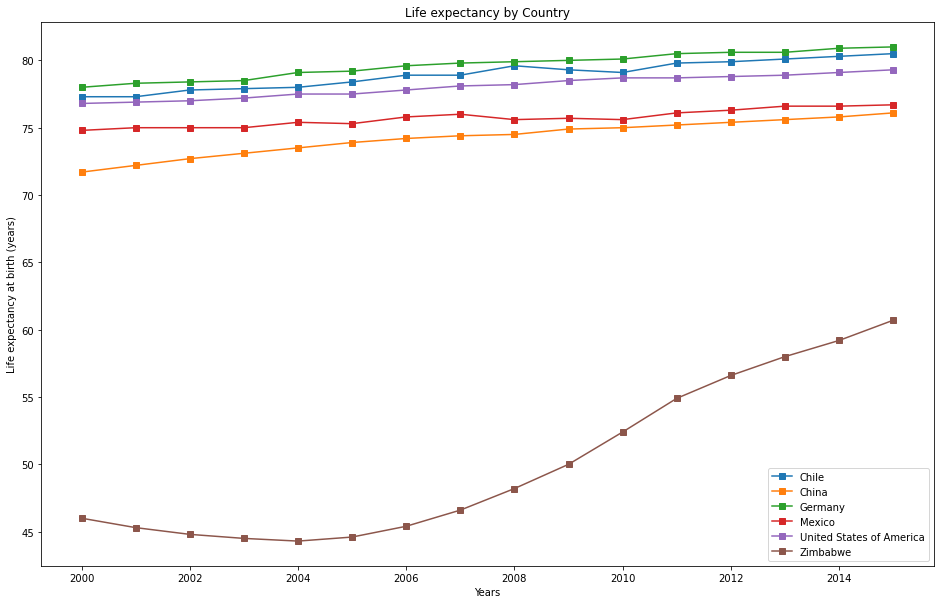

In [13]:
countries = df.Country.unique()
years = df.Year.unique()

plt.figure(figsize=(16, 10))
plt.title('Life expectancy by Country')
plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')
for country in countries:
    life_expectancy = df[df.Country == country]['Life expectancy at birth (years)']
    plt.plot(years, life_expectancy, marker='s', label=country)
    plt.legend();

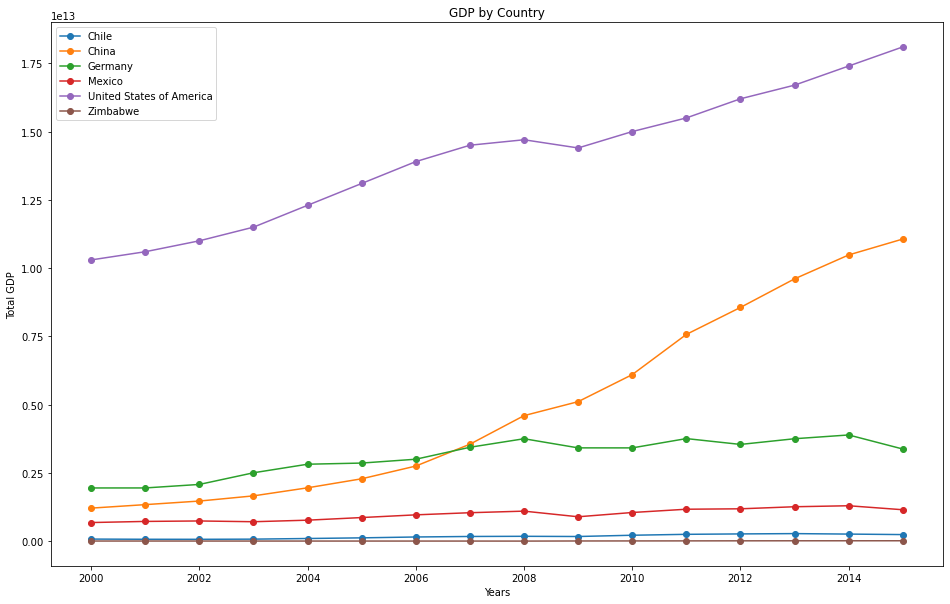

In [38]:
plt.figure(figsize=(16, 10))
plt.title('GDP by Country')
plt.xlabel('Years')
plt.ylabel('Total GDP')
for country in countries:
    gdp = df[df.Country == country].GDP
    plt.plot(years, gdp, marker='o', label=country)
    plt.legend();

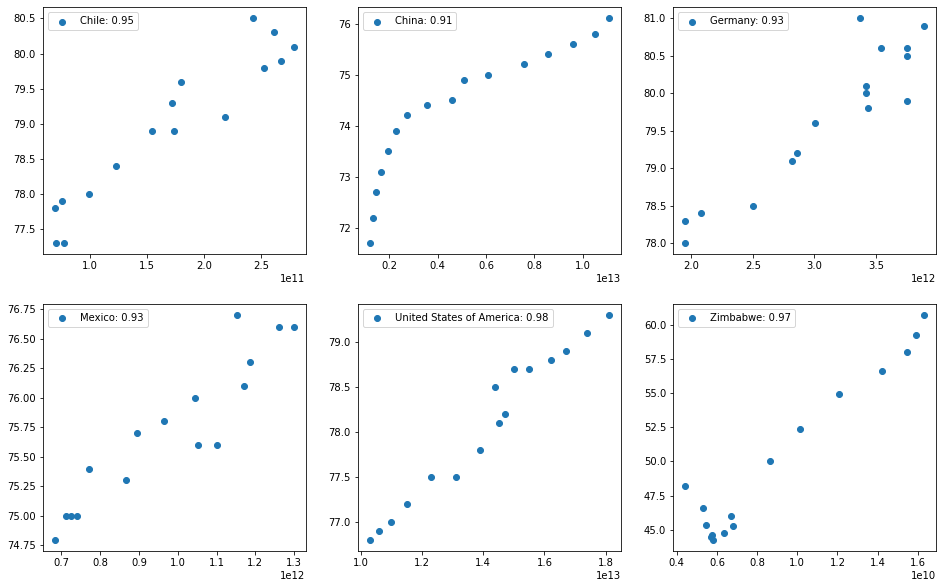

In [47]:
plt.figure(figsize=(16, 10))
subplot = 1
for country in countries:
    gdp = df[df.Country == country].GDP
    life_expectancy = df[df.Country == country]['Life expectancy at birth (years)']
    #Calculating the Pearson coeficient for each correlation
    pearson = gdp.corr(life_expectancy, 'pearson')
    plt.subplot(2, 3, subplot)
    #Showing the coeficient in the legend
    plt.scatter(gdp, life_expectancy, label='{}: {}'.format(country, pearson.round(2)))
    plt.legend();
    subplot += 1